In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [9]:
L = 5.0;
W = 5.0;
n = 50;
m = 50;
Dx = L/n;
Dy = W/m;

x = np.arange(0,(n+1)*Dx,Dx);
y = np.arange(0,(m+1)*Dy,Dy);

X,Y = np.meshgrid(x,y);

R = 5.0;
V = R*np.ones((n+1,m+1));

# for i in np.arange(0,n):
#     V[i,m-1] = V[i,m-1]+ R*x[i]*(1-x[i]);
#     V[i,0] = V[i,0] + R*x[i]*(x[i]-1);

for i in np.arange(0,n+1):
    V[i,m] = 10
    
VN = V + np.zeros((n+1,m+1)); # New iterated solution; deals with reference issue
err = VN - V; # Error between old and new iterated solution

beta = Dx/Dy; # parameter from finite difference algorithm
denom = 2*(1+beta**2); # just to make the denominator easy

# Iterative procedure (tolerances and counters)
epsilon = 1e-5;
imax = 5000;
k = 1;

while k < imax:
    
    for i in np.arange(1,n):
        
        for j in np.arange(1,m):
            
            #print("Old Tij: ", V[i,j]);
            VN[i,j]=(V[i-1,j]+V[i+1,j]+beta**2*(V[i,j-1]+V[i,j+1]))/denom;
            err[i,j] = VN[i,j]-V[i,j];
            #print("New Tij: ", VN[i,j]);
            #print("Difference in New and Old", VN[i,j]-V[i,j])
    
    V = VN + np.zeros((n+1,m+1)); # Deals with reference issue
    k += 1;
    
    errmax = np.max(err); 
    
    #print(err)
    
    if errmax < epsilon:
        
        print("Convergence after", k, "iterations.");
        break;
        
    if k == imax:
        
        print("Did not converge after", k, "iterations.");
        print("Max error on mesh: ", errmax);

Convergence after 3035 iterations.


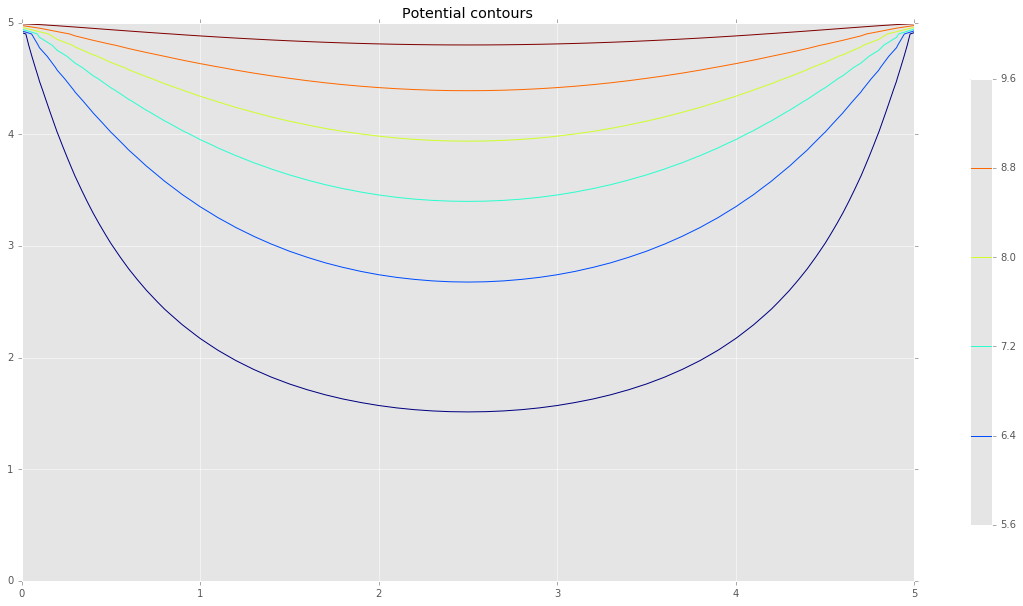

In [10]:
plt.figure()
CS = plt.contour(X, Y, V.transpose())
plt.title('Potential contours')
plt.xlim((0,L));
plt.ylim((0,W));
CB = plt.colorbar(CS, shrink=0.8, extend='both');

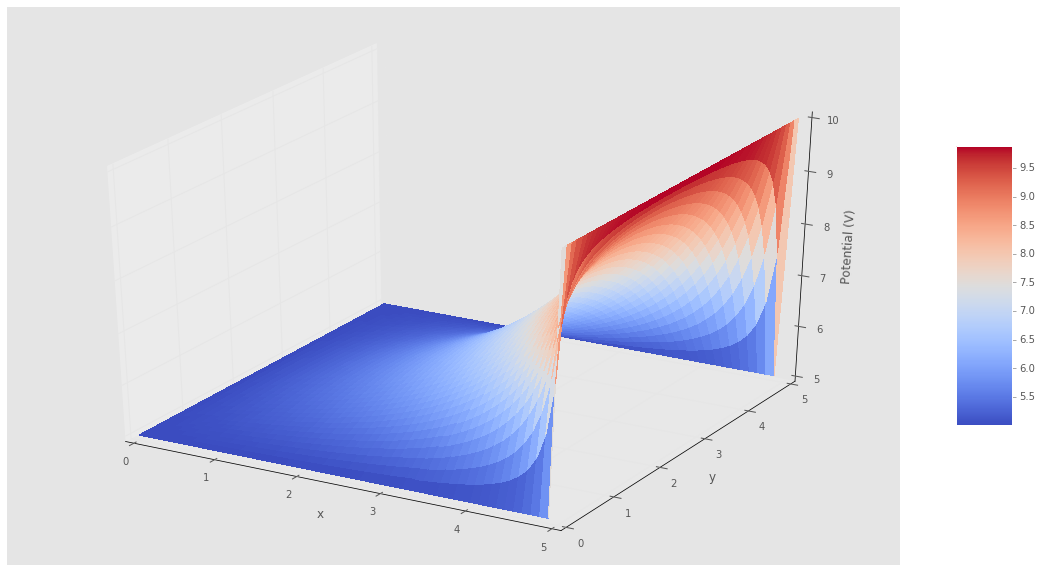

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, V, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential (V)')

In [14]:
L = 5.0;
W = 5.0;
n = 50;
m = 50;
Dx = L/n;
Dy = W/m;

x = np.arange(0,(n+1)*Dx,Dx);
y = np.arange(0,(m+1)*Dy,Dy);

X,Y = np.meshgrid(x,y);

R = 5.0;
V = R*np.ones((n+1,m+1));

# for i in np.arange(0,n):
#     V[i,m-1] = V[i,m-1]+ R*x[i]*(1-x[i]);
#     V[i,0] = V[i,0] + R*x[i]*(x[i]-1);

for i in np.arange(0,n+1):
    V[i,m] = 10
    
VN = V + np.zeros((n+1,m+1)); # New iterated solution; deals with reference issue
err = VN - V; # Error between old and new iterated solution

beta = Dx/Dy; # parameter from finite difference algorithm
denom = 2*(1+beta**2); # just to make the denominator easy

omega = 1.6;

# Iterative procedure (tolerances and counters)
epsilon = 1e-5;
imax = 5000;
k = 1;

while k < imax:
    
    for i in np.arange(1,n):
        
        for j in np.arange(1,m):
            
            #print("Old Tij: ", V[i,j]);
            VN[i,j]=(1-omega)*V[i,j]+omega*(VN[i+1,j]+VN[i-1,j]+beta**2*(V[i,j+1]+VN[i,j-1]))/denom;
            err[i,j] = VN[i,j]-V[i,j];
            #print("New Tij: ", VN[i,j]);
            #print("Difference in New and Old", VN[i,j]-V[i,j])
    
    V = VN + np.zeros((n+1,m+1)); # Deals with reference issue
    k += 1;
    
    errmax = np.max(err); 
    
    #print(err)
    
    if errmax < epsilon:
        
        print("Convergence after", k, "iterations.");
        break;
        
    if k == imax:
        
        print("Did not converge after", k, "iterations.");
        print("Max error on mesh: ", errmax);

Convergence after 520 iterations.


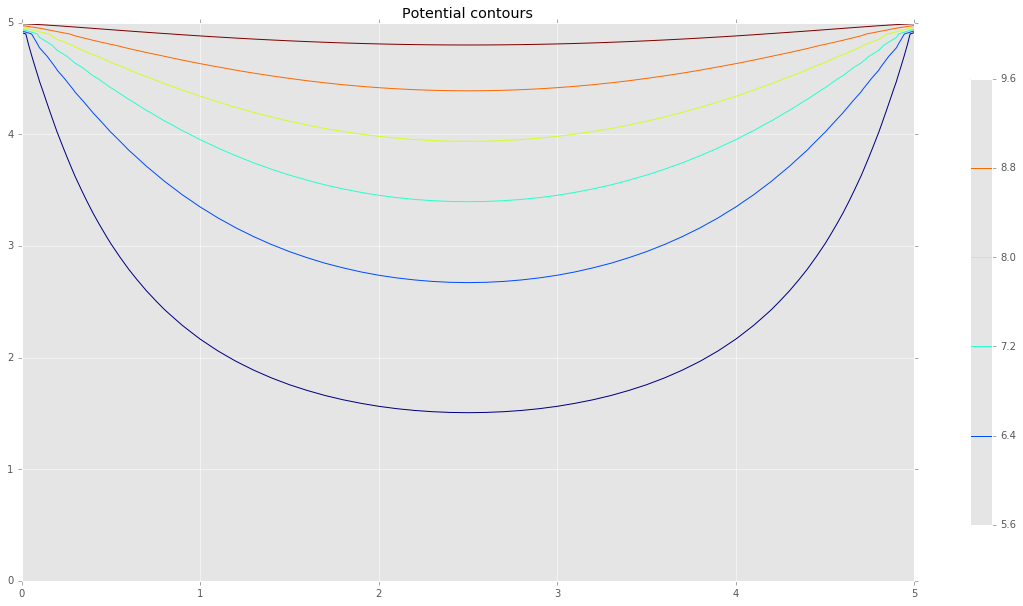

In [15]:
plt.figure()
CS = plt.contour(X, Y, V.transpose())
plt.title('Potential contours')
plt.xlim((0,L));
plt.ylim((0,W));
CB = plt.colorbar(CS, shrink=0.8, extend='both');

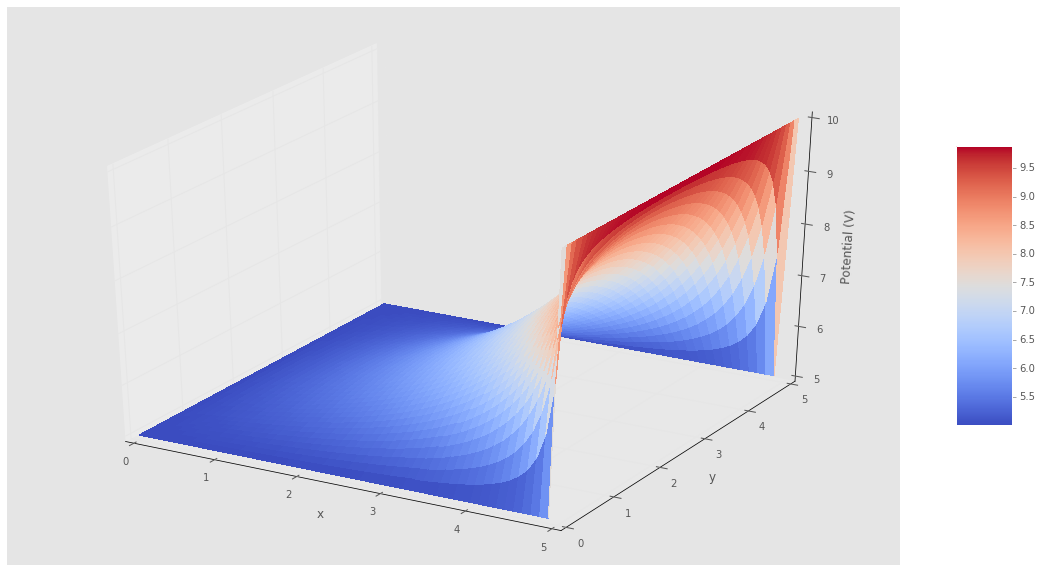

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, V, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential (V)')